In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('mof.csv')
df

,pld,surface_area_m2g,label
0,2.93515,18.4268,0
1,3.21360,613.2570,1
2,3.98810,258.3630,0
3,6.93817,365.9500,0
4,1.91197,247.3670,1
...,...,...,...
193,5.32598,241.8870,0
194,10.73000,602.5550,0
195,2.52259,25.6035,0
196,2.49261,11.6380,0


In [3]:
X0 = df['pld']
X1 = df['surface_area_m2g']

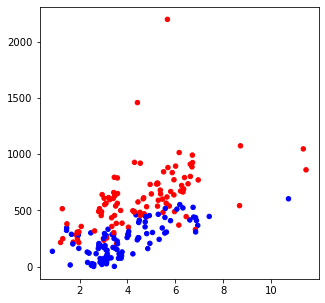

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(X0, X1, c = df['label'], cmap = 'bwr', s = 20)
plt.show()

In [5]:
X = df[['pld', 'surface_area_m2g']].values
y = df['label']

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X, y)

KNeighborsClassifier()

In [8]:
import numpy as np

In [9]:
np.min(df['pld']), np.max(df['pld'])

(0.86536, 11.4623)

In [10]:
np.min(df['surface_area_m2g']), np.max(df['surface_area_m2g'])

(0.969831, 2198.28)

In [11]:
xx, yy = np.meshgrid(np.arange(0.0, 12.0, 0.1), np.arange(-100, 2300, 1))
coords = np.stack((xx.reshape(-1), yy.reshape(-1)), axis = 1)

In [12]:
Z = clf_knn.predict(coords)
Z = Z.reshape(xx.shape)

In [13]:
from matplotlib.colors import ListedColormap

def plot_res(X0, X1, xx, yy, Z):
    light_rgb = ListedColormap(['#AAAAFF', '#FFAAAA'])
    plt.figure(figsize = (5, 5))
    plt.pcolormesh(xx, yy, Z, shading='auto', cmap = light_rgb)
    plt.scatter(X0, X1, c = df['label'], cmap = 'bwr', s = 20)
    plt.show()

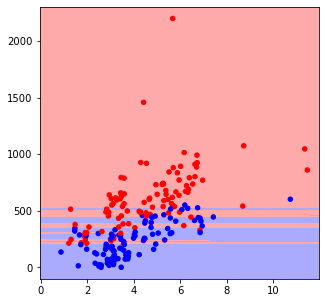

In [14]:
plot_res(X0, X1, xx, yy, Z)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_scaler = scaler.fit_transform(X)

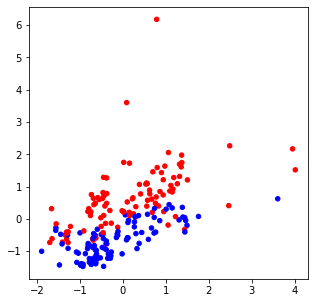

In [18]:
plt.figure(figsize = (5, 5))
plt.scatter(X_scaler[:, 0], X_scaler[:, 1], c = df['label'], cmap = 'bwr', s = 20)
plt.show()

In [19]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_scaler, y)

KNeighborsClassifier()

In [20]:
xx_s, yy_s = np.meshgrid(np.arange(-3, 5, 0.1), np.arange(-2, 7, 0.1))
coords_s = np.stack((xx_s.reshape(-1), yy_s.reshape(-1)), axis = 1)

In [21]:
Z_s = clf_knn.predict(coords_s)
Z_s = Z_s.reshape(xx_s.shape)

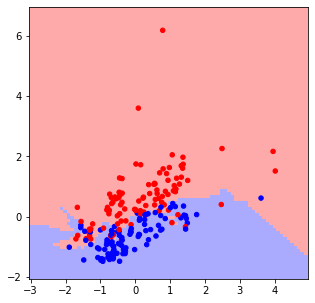

In [22]:
plot_res(X_scaler[:, 0], X_scaler[:, 1], xx_s, yy_s, Z_s)

In [23]:
Z = clf_knn.predict(scaler.transform(coords))
Z = Z.reshape(xx.shape)

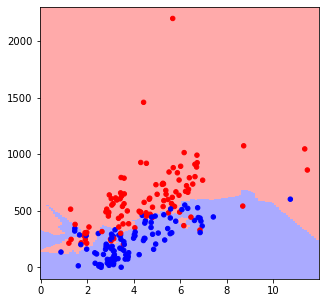

In [24]:
plot_res(X0, X1, xx, yy, Z)

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [26]:
clf_svm = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
clf_svm.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [27]:
Z = clf_svm.predict(coords)
Z = Z.reshape(xx.shape)

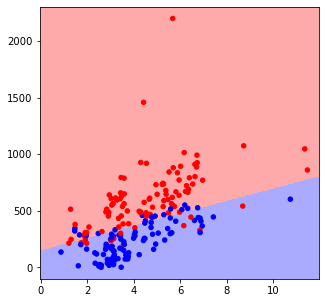

In [28]:
plot_res(X0, X1, xx, yy, Z)

In [29]:
clf_svm2 = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))
clf_svm2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [30]:
Z = clf_svm2.predict(coords)
Z = Z.reshape(xx.shape)

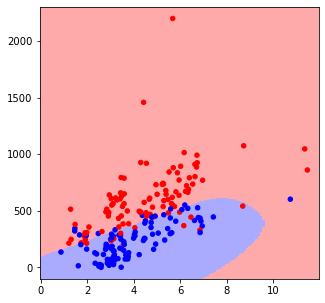

In [31]:
plot_res(X0, X1, xx, yy, Z)

# 15:00继续

In [32]:
from sklearn.metrics import precision_score

In [42]:
precision_score(y, clf_knn.predict(X_scaler))

0.8910891089108911

In [43]:
from sklearn.metrics import recall_score

In [44]:
recall_score(y, clf_knn.predict(X_scaler))

0.8823529411764706

In [45]:
y_score = clf_knn.predict_proba(X_scaler)

In [47]:
y_score = y_score[:, 1]

In [49]:
from sklearn.metrics import PrecisionRecallDisplay

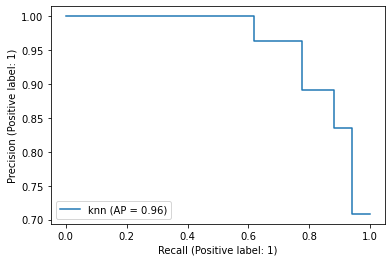

In [50]:
display = PrecisionRecallDisplay.from_predictions(y, y_score, name = 'knn')

In [52]:
from sklearn.metrics import precision_recall_curve

In [54]:
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y, y_score)

In [55]:
precision_knn, recall_knn, thresholds_knn

(array([0.70833333, 0.83478261, 0.89108911, 0.96341463, 1.        ,
        1.        ]),
 array([1.        , 0.94117647, 0.88235294, 0.7745098 , 0.61764706,
        0.        ]),
 array([0.2, 0.4, 0.6, 0.8, 1. ]))

In [58]:
clf_svm3 = SVC(kernel = 'linear', probability = True)
clf_svm3.fit(X_scaler, y)

SVC(kernel='linear', probability=True)

In [59]:
precision_svm3, recall_svm3, thresholds_svm3 = precision_recall_curve(y, clf_svm3.predict_proba(X_scaler)[:, 1])

In [60]:
clf_svm4 = SVC(kernel = 'rbf', probability = True)
clf_svm4.fit(X_scaler, y)

SVC(probability=True)

In [61]:
precision_svm4, recall_svm4, thresholds_svm4 = precision_recall_curve(y, clf_svm4.predict_proba(X_scaler)[:, 1])

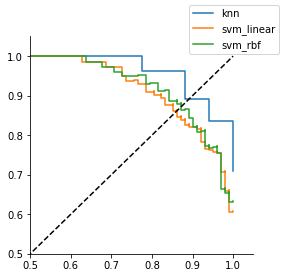

In [64]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.step(recall_knn, precision_knn, label = 'knn')
ax.step(recall_svm3, precision_svm3, label = 'svm_linear')
ax.step(recall_svm4, precision_svm4, label = 'svm_rbf')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim(0.5, 1.05)
ax.set_ylim(0.5, 1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

plt.show()

In [65]:
from sklearn.metrics import f1_score

In [66]:
f1_score(y, clf_knn.predict(X_scaler))

0.8866995073891626

In [67]:
f1_score(y, clf_svm3.predict(X_scaler))

0.854368932038835

# 16:07继续

In [68]:
from sklearn.metrics import roc_curve

In [69]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y, clf_knn.predict_proba(X_scaler)[:, 1], pos_label = 1)

In [70]:
fpr_knn, tpr_knn, thresholds_knn

(array([0.        , 0.        , 0.03125   , 0.11458333, 0.19791667,
        0.4375    , 1.        ]),
 array([0.        , 0.61764706, 0.7745098 , 0.88235294, 0.94117647,
        1.        , 1.        ]),
 array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))

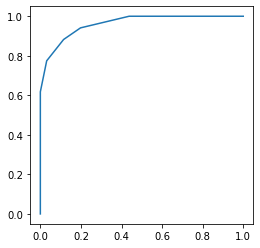

In [71]:
plt.figure(figsize = (4, 4))
plt.plot(fpr_knn, tpr_knn)
plt.show()

In [72]:
fpr_svm3, tpr_svm3, thresholds_svm3 = roc_curve(y, clf_svm3.predict_proba(X_scaler)[:, 1], pos_label = 1)

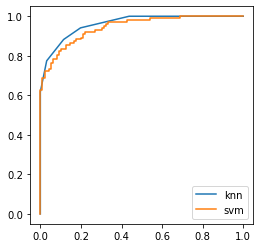

In [73]:
plt.figure(figsize = (4, 4))
plt.plot(fpr_knn, tpr_knn, label = 'knn')
plt.plot(fpr_svm3, tpr_svm3, label = 'svm')
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import auc

roc_auc = auc(fpr_knn, tpr_knn)
roc_auc

0.9618055555555556

In [75]:
roc_auc = auc(fpr_svm3, tpr_svm3)
roc_auc

0.9441380718954249